<a href="https://colab.research.google.com/github/wendemsky/direct_s2s_translation/blob/main/direct_s2s_translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gTTS


In [ ]:
# Import the required module for text
# to speech conversion
from gtts import gTTS

# This module is imported so that we can
# play the converted audio
import os

# Function to convert text to speech and save as mp3
def text_to_speech(input_file, language, output_folder):
    # Read the text from the input file
    with open(input_file, 'r', encoding='utf-8') as file:
        sentences = file.readlines()

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Convert each sentence to audio
    for index, sentence in enumerate(sentences):
        sentence = sentence.strip()
        if sentence:
            # Create a gTTS object
            tts = gTTS(text=sentence, lang=language, slow=False)

            # Save the audio file
            audio_file = os.path.join(output_folder, f"{index+1}.mp3")
            tts.save(audio_file)

            print(f"Converted and saved: {audio_file}")

# Language for English and Korean
english_language = 'en'
korean_language = 'ko'

# Input and output folders
english_input_file = 'english_text.txt'
korean_input_file = 'korean_text.txt'
english_output_folder = 'english_audio'
korean_output_folder = 'korean_audio'

# Convert English text to audio
text_to_speech(english_input_file, english_language, english_output_folder)

# Convert Korean text to audio
text_to_speech(korean_input_file, korean_language, korean_output_folder)


Converted and saved: english_audio/1.mp3
Converted and saved: english_audio/2.mp3
Converted and saved: english_audio/3.mp3
Converted and saved: english_audio/4.mp3
Converted and saved: english_audio/5.mp3
Converted and saved: english_audio/6.mp3
Converted and saved: english_audio/7.mp3
Converted and saved: english_audio/8.mp3
Converted and saved: english_audio/9.mp3
Converted and saved: english_audio/10.mp3
Converted and saved: english_audio/11.mp3
Converted and saved: english_audio/12.mp3
Converted and saved: english_audio/13.mp3
Converted and saved: english_audio/14.mp3
Converted and saved: english_audio/15.mp3
Converted and saved: english_audio/16.mp3
Converted and saved: english_audio/17.mp3
Converted and saved: english_audio/18.mp3
Converted and saved: english_audio/19.mp3
Converted and saved: english_audio/20.mp3
Converted and saved: english_audio/21.mp3
Converted and saved: english_audio/22.mp3
Converted and saved: english_audio/23.mp3
Converted and saved: english_audio/24.mp3
C

Change the file names on both the folders from 1.mp3 to 50.mp3

In [ ]:
# import os


# # def rename_mp3_files(folder_path):
# #     files = os.listdir(folder_path)
# #     mp3_files = [f for f in files if f.lower().endswith('.mp3')]

# #     print(f'Folder path: {folder_path}')
# #     print(f'All files in the folder: {files}')
# #     print(f'MP3 files found: {len(mp3_files)}')

# #     for index, mp3_file in enumerate(mp3_files, start=1):
# #         old_path = os.path.join(folder_path, mp3_file)
# #         new_path = os.path.join(folder_path, f'{index}.mp3')
# #         os.rename(old_path, new_path)
# #         print(f'Renamed {old_path} to {new_path}')


# # if __name__ == "__main__":
# #     folder_path_en = r'/content/english_audio'  # Change this to your mp3 file folder
# #     folder_path_kr = r'/content/korean_audio'
# #     rename_mp3_files(folder_path_en)
# #     rename_mp3_files(folder_path_kr)
# #     print("MP3 files renamed successfully!")


In [ ]:
import os
import csv

# Paths to audio folders
english_audio_folder = 'english_audio'
korean_audio_folder = 'korean_audio'
english_text_file = 'english_text.txt'
korean_text_file = 'korean_text.txt'

# Read the English and Korean text files
with open(english_text_file, 'r', encoding='utf-8') as eng_file, \
     open(korean_text_file, 'r', encoding='utf-8') as kor_file:
    english_translations = eng_file.readlines()
    korean_translations = kor_file.readlines()

# Ensure the audio and text lists match
if len(english_translations) != len(korean_translations):
    raise ValueError("Number of audio files and translations don't match!")

# Create a list to hold dataset entries
dataset = []

# Walk through the English audio folder
for root, _, files in os.walk(english_audio_folder):
    for file in files:
        if file.endswith('.mp3'):
            # Create the file paths for English and Korean audio
            english_audio_path = os.path.join(root, file)
            korean_audio_path = os.path.join(korean_audio_folder, file)

            # Get the corresponding translations
            index = int(file.split('.')[0]) - 1
            english_translation = english_translations[index].strip()
            korean_translation = korean_translations[index].strip()

            dataset.append([english_audio_path, english_translation, korean_audio_path, korean_translation])

# Save the dataset to a CSV file
with open('speech_to_speech_dataset.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['audio_path_english', 'translation_english', 'audio_path_korean', 'translation_korean'])
    csv_writer.writerows(dataset)


Data Cleaning - Data cleaning procedures were not necessary for this project as the dataset comprises only 50 audio files. Each audio file and its corresponding text translation were manually reviewed to ensure data quality and consistency.

Data Loading

Now, We Load the dataset from the CSV file.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the path to your CSV file containing the dataset
csv_file_path = 'speech_to_speech_dataset.csv'  # Replace with the actual file path

# Load the dataset into a Pandas DataFrame
dataset = pd.read_csv(csv_file_path)

# Split the dataset into training, validation, and testing sets
# Using train_test_split from scikit-learn for proper random splitting
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

train_dataset, test_val_dataset = train_test_split(dataset, test_size=(1 - train_ratio))
val_dataset, test_dataset = train_test_split(test_val_dataset, test_size=test_ratio / (test_ratio + val_ratio))

# Verify the sizes of the splits
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")
print(f"Number of testing samples: {len(test_dataset)}")


Number of training samples: 40
Number of validation samples: 5
Number of testing samples: 5


In [ ]:
!pip install --upgrade tensorflow

Data Preprocessing

Now that we have loaded the data successfully, We will now preprocess the data.


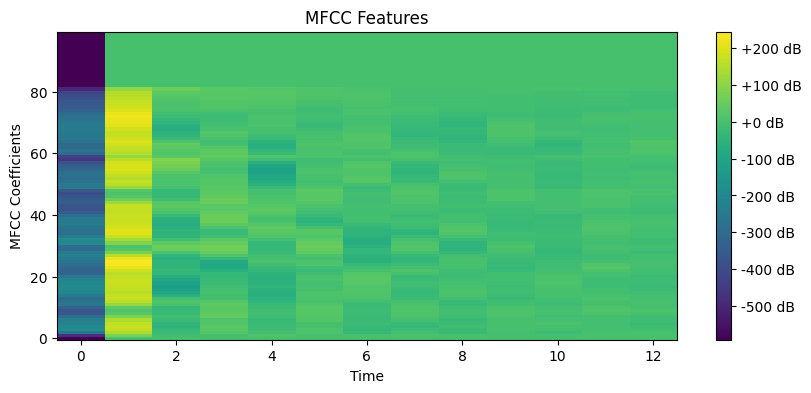

Example MFCC coefficients for the first sample:
[[-591    0    0 ...    0    0    0]
 [-480   75  -13 ...   -4    2    2]
 [-270  138  -20 ...  -14    0    0]
 ...
 [-592    0    0 ...    0    0    0]
 [-592    0    0 ...    0    0    0]
 [-592    0    0 ...    0    0    0]]
Preprocessed dataset saved to: preprocessed_speech_to_speech_dataset.csv


In [ ]:
# import os
# import numpy as np
# import librosa
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split

# # Paths to the audio folders and the CSV dataset file
# english_audio_folder = 'english_audio'
# korean_audio_folder = 'korean_audio'
# dataset_file = 'speech_to_speech_dataset.csv'

# # Load the dataset from the CSV file
# dataset = pd.read_csv(dataset_file)

# # Define the maximum sequence length for audio and text (adjust as needed)
# max_audio_length = 100  # You can change this value based on your model's requirements
# max_seq_length = 50  # Define your desired sequence length for text data

# # Initialize lists to store audio features and text data
# X_audio = []
# X_text = []
# Y_text = []

# # Initialize tokenizers for text data
# english_tokenizer = Tokenizer()
# korean_tokenizer = Tokenizer()

# # Extract MFCC features from audio and tokenize text
# sample_rate = 22050  # Define the sample rate (adjust as needed)

# # Function to plot MFCC features
# def plot_mfcc(mfcc):
#     plt.figure(figsize=(10, 4))
#     plt.imshow(mfcc, cmap='viridis', origin='lower', aspect='auto')
#     plt.title('MFCC Features')
#     plt.xlabel('Time')
#     plt.ylabel('MFCC Coefficients')
#     plt.colorbar(format='%+2.0f dB')
#     plt.show()

# # Function to plot MFCC coefficients
# def plot_mfcc_coefficients(mfcc):
#     plt.figure(figsize=(8, 4))
#     plt.plot(mfcc)
#     plt.title('MFCC Coefficients')
#     plt.xlabel('Frame')
#     plt.ylabel('Amplitude')
#     plt.grid()
#     plt.show()

# for index, row in dataset.iterrows():
#     # Load and preprocess audio
#     audio_path = os.path.join(english_audio_folder, os.path.basename(row['audio_path_english']))
#     signal, _ = librosa.load(audio_path, sr=sample_rate)
#     mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13, hop_length=512, n_fft=2048)
#     mfccs = pad_sequences([mfccs.T], maxlen=max_audio_length, padding='post')[0]  # Padding/truncating

#     # Plot an example MFCC
#     if index == 0:
#         plot_mfcc(mfccs)
#         # Print an example of MFCC coefficients for the first sample
#         print("Example MFCC coefficients for the first sample:")
#         print(mfccs)

#     # Tokenize and encode English and Korean text
#     english_text = row['translation_english']
#     korean_text = row['translation_korean']
#     english_seq = english_tokenizer.texts_to_sequences([english_text])[0]
#     korean_seq = korean_tokenizer.texts_to_sequences([korean_text])[0]

#     # Append to lists
#     X_audio.append(mfccs)
#     X_text.append(english_seq)  # Using English as input text
#     Y_text.append(korean_seq)  # Using Korean as target text

# # Convert lists to numpy arrays
# X_audio = np.array(X_audio)
# X_text = pad_sequences(X_text, maxlen=max_seq_length, padding='post')
# Y_text = pad_sequences(Y_text, maxlen=max_seq_length, padding='post')

# # Define the path for the new CSV file containing preprocessed data
# preprocessed_csv_file = 'preprocessed_speech_to_speech_dataset.csv'

# # Save the preprocessed data to the new CSV file
# preprocessed_dataset = pd.DataFrame({'audio_path_english': dataset['audio_path_english'],
#                                      'translation_english': dataset['translation_english'],
#                                      'audio_path_korean': dataset['audio_path_korean'],
#                                      'translation_korean': dataset['translation_korean'],
#                                      'mfcc_features': list(X_audio),
#                                      'english_sequence': X_text.tolist(),  # Convert to list
#                                      'korean_sequence': Y_text.tolist()})  # Convert to list

# preprocessed_dataset.to_csv(preprocessed_csv_file, index=False, encoding='utf-8')

# print("Preprocessed dataset saved to:", preprocessed_csv_file)


In [ ]:
!pip install tensorflow


In [ ]:
# import os
# import numpy as np
# import librosa
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split

# # Paths to the audio folders and the CSV dataset file
# english_audio_folder = 'english_audio'
# korean_audio_folder = 'korean_audio'
# dataset_file = 'speech_to_speech_dataset.csv'

# # Load the dataset from the CSV file
# dataset = pd.read_csv(dataset_file)

# # Define the maximum sequence length for audio and text (adjust as needed)
# max_audio_length = 100  # You can change this value based on your model's requirements
# max_seq_length = 50  # Define your desired sequence length for text data

# # Initialize lists to store audio features and text data
# X_audio = []
# X_text = []
# Y_text = []

# # Initialize tokenizers for text data
# english_tokenizer = Tokenizer()
# korean_tokenizer = Tokenizer()

# # Extract MFCC features from audio and tokenize text
# sample_rate = 22050  # Define the sample rate (adjust as needed)

# # Function to plot MFCC features
# def plot_mfcc(mfcc):
#     plt.figure(figsize=(10, 4))
#     plt.imshow(mfcc, cmap='viridis', origin='lower', aspect='auto')
#     plt.title('MFCC Features')
#     plt.xlabel('Time')
#     plt.ylabel('MFCC Coefficients')
#     plt.colorbar(format='%+2.0f dB')
#     plt.show()

# # Function to plot MFCC coefficients
# def plot_mfcc_coefficients(mfcc):
#     plt.figure(figsize=(8, 4))
#     plt.plot(mfcc)
#     plt.title('MFCC Coefficients')
#     plt.xlabel('Frame')
#     plt.ylabel('Amplitude')
#     plt.grid()
#     plt.show()

# # Split the dataset into training and validation sets
# train_dataset, val_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# # Preprocess each sample in the training dataset
# for index, row in train_dataset.iterrows():
#     # Load and preprocess audio
#     audio_path = os.path.join(english_audio_folder, os.path.basename(row['audio_path_english']))
#     signal, _ = librosa.load(audio_path, sr=sample_rate)
#     mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13, hop_length=512, n_fft=2048)
#     mfccs = pad_sequences([mfccs.T], maxlen=max_audio_length, padding='post')[0]  # Padding/truncating

#     # Tokenize and encode English and Korean text
#     english_text = row['translation_english']
#     korean_text = row['translation_korean']
#     english_seq = english_tokenizer.texts_to_sequences([english_text])[0]
#     korean_seq = korean_tokenizer.texts_to_sequences([korean_text])[0]

#     # Append to lists
#     X_audio.append(mfccs)
#     X_text.append(english_seq)  # Using English as input text
#     Y_text.append(korean_seq)  # Using Korean as target text

# # Convert lists to numpy arrays
# X_audio = np.array(X_audio)
# X_text = pad_sequences(X_text, maxlen=max_seq_length, padding='post')
# Y_text = pad_sequences(Y_text, maxlen=max_seq_length, padding='post')

# # Define the path for the new CSV file containing preprocessed data
# preprocessed_csv_file = 'preprocessed_speech_to_speech_dataset.csv'

# # Save the preprocessed data to the new CSV file
# preprocessed_dataset = pd.DataFrame({'audio_path_english': train_dataset['audio_path_english'],
#                                      'translation_english': train_dataset['translation_english'],
#                                      'audio_path_korean': train_dataset['audio_path_korean'],
#                                      'translation_korean': train_dataset['translation_korean'],
#                                      'mfcc_features': list(X_audio),
#                                      'english_sequence': X_text.tolist(),  # Convert to list
#                                      'korean_sequence': Y_text.tolist()})  # Convert to list

# preprocessed_dataset.to_csv(preprocessed_csv_file, index=False, encoding='utf-8')

# print("Preprocessed dataset saved to:", preprocessed_csv_file)


Preprocessed dataset saved to: preprocessed_speech_to_speech_dataset.csv


In [ ]:
import os
import numpy as np
import librosa
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model  # Import the function to load the model

# Paths to the audio folders and the CSV dataset file
english_audio_folder = 'english_audio'
korean_audio_folder = 'korean_audio'
dataset_file = 'speech_to_speech_dataset.csv'

# Load the dataset from the CSV file
dataset = pd.read_csv(dataset_file)

# Define the maximum sequence length for audio and text (adjust as needed)
max_audio_length = 100
max_seq_length = 50

# Initialize lists to store audio features and text data
X_audio = []
X_text = []
Y_text = []

# Initialize tokenizers for text data
english_tokenizer = Tokenizer()
korean_tokenizer = Tokenizer()

# Extract MFCC features from audio and tokenize text
sample_rate = 22050

# Function to plot MFCC features
def plot_mfcc(mfcc):
    plt.figure(figsize=(10, 4))
    plt.imshow(mfcc, cmap='viridis', origin='lower', aspect='auto')
    plt.title('MFCC Features')
    plt.xlabel('Time')
    plt.ylabel('MFCC Coefficients')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

# Function to plot MFCC coefficients
def plot_mfcc_coefficients(mfcc):
    plt.figure(figsize=(8, 4))
    plt.plot(mfcc)
    plt.title('MFCC Coefficients')
    plt.xlabel('Frame')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

# Split the dataset into training and validation sets
train_dataset, val_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Preprocess each sample in the validation dataset
X_val_audio = []
X_val_text = []
Y_val_text = []

for index, row in val_dataset.iterrows():
    # Load and preprocess audio (similar to the training data preprocessing)
    audio_path = os.path.join(english_audio_folder, os.path.basename(row['audio_path_english']))
    signal, _ = librosa.load(audio_path, sr=sample_rate)
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13, hop_length=512, n_fft=2048)
    mfccs = pad_sequences([mfccs.T], maxlen=max_audio_length, padding='post')[0]

    # Tokenize and encode English and Korean text (similar to the training data preprocessing)
    english_text = row['translation_english']
    korean_text = row['translation_korean']
    english_seq = english_tokenizer.texts_to_sequences([english_text])[0]
    korean_seq = korean_tokenizer.texts_to_sequences([korean_text])[0]

    # Append to validation lists
    X_val_audio.append(mfccs)
    X_val_text.append(english_seq)
    Y_val_text.append(korean_seq)

# Convert validation lists to numpy arrays
X_val_audio = np.array(X_val_audio)
X_val_text = pad_sequences(X_val_text, maxlen=max_seq_length, padding='post')
Y_val_text = pad_sequences(Y_val_text, maxlen=max_seq_length, padding='post')

# Load the trained model
model = load_model('speech_to_speech_translation_model.h5')  # Replace with your model's filename

# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate([X_val_audio, X_val_text], Y_val_text, verbose=1)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Now, you can proceed with inference using the loaded model
# ...

# For example, to perform inference on a single input:
# audio_input = ...  # Load and preprocess a single audio input
# text_input = ...   # Tokenize and preprocess the corresponding text input
# inference_result = model.predict([audio_input, text_input])
# ...

# Save the trained model if needed
# model.save('speech_to_speech_translation_model.h5')


1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Validation Loss: 0.0
Validation Accuracy: 0.0


Before moving on to the model phase, let's check the shapes and data to ensure everything is in order.

In [ ]:
# Check the shapes of the preprocessed data
print("X_audio shape:", X_audio.shape)
print("X_text shape:", X_text.shape)
print("Y_text shape:", Y_text.shape)

# Check a sample of the preprocessed data
print("Sample of X_audio:")
print(X_audio[0])  # Print the first sample as an example

print("Sample of X_text:")
print(X_text[0])  # Print the first sample as an example

print("Sample of Y_text:")
print(Y_text[0])  # Print the first sample as an example


X_audio shape: (40, 100, 13)
X_text shape: (40, 50)
Y_text shape: (40, 50)
Sample of X_audio:
[[-389  118   22 ...   -7    0  -15]
 [-427   52   -1 ...   -2   -7    3]
 [-289   47  -33 ...    2    6    8]
 ...
 [-589    0    0 ...    0    0    0]
 [-589    0    0 ...    0    0    0]
 [-589    0    0 ...    0    0    0]]
Sample of X_text:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Sample of Y_text:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In data preprocessing, we transformed our bilingual audio-text dataset. We extracted audio features (MFCCs) and tokenized and encoded text, creating a well-structured dataset ready for training our speech translation model.

Model

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the model architecture
latent_dim = 256  # Adjust this value as needed

# Define input layers
audio_input = Input(shape=(max_audio_length, 13))
text_input = Input(shape=(max_seq_length,))

# Define embedding layers for text data
# Use the same embedding layer for both source and target text
embedding_layer = Embedding(input_dim=len(english_tokenizer.word_index) + 1, output_dim=latent_dim)

text_embedding = embedding_layer(text_input)

# Define the encoder LSTM
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(audio_input)

# Connect encoder and decoder
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(text_embedding, initial_state=[state_h, state_c])

# Define the output layer
output_layer = Dense(len(korean_tokenizer.word_index) + 1, activation='softmax')
output = output_layer(decoder_outputs)

# Define the model
model = Model([audio_input, text_input], output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Prepare target sequences for training
Y_train = pad_sequences(Y_text, maxlen=max_seq_length, padding='post')
Y_train = to_categorical(Y_train, num_classes=len(korean_tokenizer.word_index) + 1)

# Train the model
model.fit([X_audio, X_text], Y_train, batch_size=64, epochs=50, validation_split=0.2)

# Save the trained model if needed
# model.save('speech_to_speech_translation_model.h5')


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 50)]                 0         []                            
                                                                                                  
 input_11 (InputLayer)       [(None, 100, 13)]            0         []                            
                                                                                                  
 embedding_7 (Embedding)     (None, 50, 256)              256       ['input_12[0][0]']            
                                                                                                  
 lstm_10 (LSTM)              [(None, 256),                276480    ['input_11[0][0]']            
                              (None, 256),                                                  

In [ ]:
# Save the trained model in the native Keras format
model.save('speech_to_speech_translation_model.keras')


In [ ]:
from tensorflow import keras

# Load the saved model
model = keras.models.load_model('speech_to_speech_translation_model.keras')


In [ ]:
print("X_audio shape:", X_audio.shape)
print("X_text shape:", X_text.shape)
print("Y_val shape:", Y_val.shape)


X_audio shape: (50, 100, 13)
X_text shape: (50, 50)
Y_val shape: (5, 50, 125, 125)


Evaluate the model on the validation data


In [ ]:
# Evaluate the model on the validation data
metrics = model.evaluate([X_audio, X_text], Y_val)

# Extract and print relevant metrics
loss = metrics[0]
accuracy = metrics[1]

print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)


ValueError: ignored